### Importojmë libraritë e kërkuara

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Lexojmë të dhënat nga skedari  .csv


In [2]:
students = pd.read_csv("input/students.csv")

### Shtypja e rreshtave të parë të DataFrame 'students' për të kuptuar kolonat e ndryshme të të dhënave


In [3]:
students.head()

,gender,race ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelors degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,masters degree,standard,none,90,95,93
3,male,group A,associates degree,free reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Forma e DataFrame


In [4]:
students.shape

(1000, 8)

### Informata më të hollësishme në lidhje me DataFrame

In [5]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Kontrollojmë vlerat që mungojnë

In [6]:
students.isnull().sum()

gender                         0
race ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

*është e qartë nga lart se DataFrame nuk ka ndonjë vlerë të humbur (null). Nuk kemi nevojë të shqetësohemi për vlerat e pavlefshme.*

In [7]:
students['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [8]:
students['race ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race ethnicity, dtype: int64

In [9]:
students['parental level of education'].value_counts()

some college         226
associates degree    222
high school          196
some high school     179
bachelors degree     118
masters degree        59
Name: parental level of education, dtype: int64

In [10]:
students['lunch'].value_counts()

standard        645
free reduced    355
Name: lunch, dtype: int64

In [11]:
students['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

### Le të kuptojmë në lidhje me vlerat themelore si minimale, maksimale, mesatare, mesatare, modaliteti, devijimi standard etj. I kolonave numerike (përbëhet nga rezultate në provime të ndryshme) të DataFrame

In [12]:
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Shtojmë nje kolone qe llogarit noten mesatare qe ne do ta quajme "Përqindja"

**Totali i notave (për një student) = shuma e notave / pikëve në 3 provimet për një student të veçantë.**
**Përqindja (për një student) = Shuma e notave/pikëve në 3 provimet për një student të veçantë i ndarë me numrin e lendeve perkatesisht 3**

In [13]:
students["Perqindja"] = (students["math score"] + students["reading score"] + students["writing score"])/3
students.head()

,gender,race ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Perqindja
0,female,group B,bachelors degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,masters degree,standard,none,90,95,93,92.666667
3,male,group A,associates degree,free reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


**Mënyra e vlerësimit:
Mbi 90 -> A
80 deri 89 -> B
70 deri 79 -> C
60 deri 69 -> D
50 deri 59 -> E
më pak se 50 -> F (do të thotë dështim)**

*Duke konsideruar 50 si notë kaluese*

In [14]:
def Grade(marks):
    if marks >= 90:
        grade = 'A'
    elif marks >= 80:
        grade = 'B'
    elif marks >= 70:
        grade = 'C'
    elif marks >= 60:
        grade = 'D'
    elif marks >= 50:
        grade = 'E'
    else:
        grade = 'F'
    return grade
        
        
students["Grade_math"] = students["math score"].apply(lambda s: Grade(s))
students["Grade_reading"] = students["reading score"].apply(lambda s: Grade(s))
students["Grade_writing"] = students["writing score"].apply(lambda s: Grade(s))
students["Nota_Pergjithshme"] = students["Perqindja"].apply(lambda s: Grade(s))
students.head()


,gender,race ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Perqindja,Grade_math,Grade_reading,Grade_writing,Nota_Pergjithshme
0,female,group B,bachelors degree,standard,none,72,72,74,72.666667,C,C,C,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,D,A,B,B
2,female,group B,masters degree,standard,none,90,95,93,92.666667,A,A,A,A
3,male,group A,associates degree,free reduced,none,47,57,44,49.333333,F,E,F,F
4,male,group C,some college,standard,none,76,78,75,76.333333,C,C,C,C


In [15]:
students['Nota_Pergjithshme'].value_counts()

C    261
D    256
E    182
B    146
F    103
A     52
Name: Nota_Pergjithshme, dtype: int64

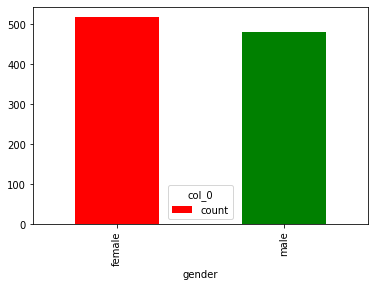

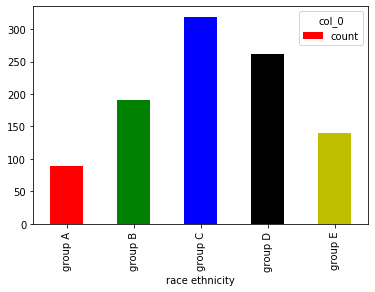

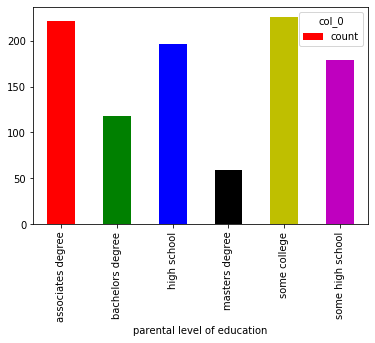

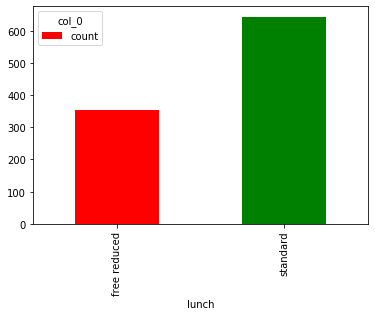

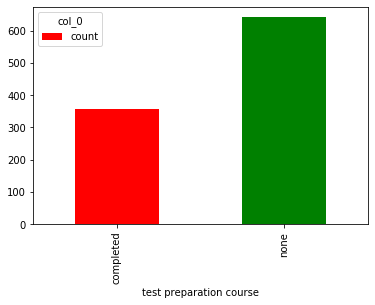

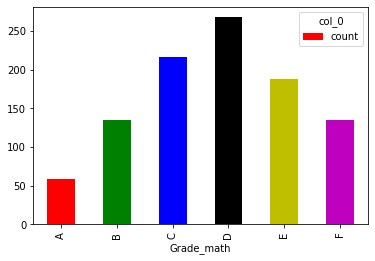

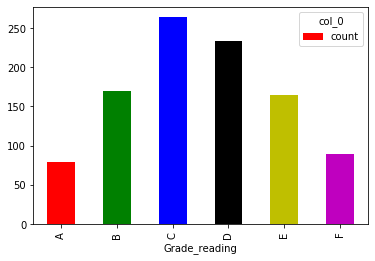

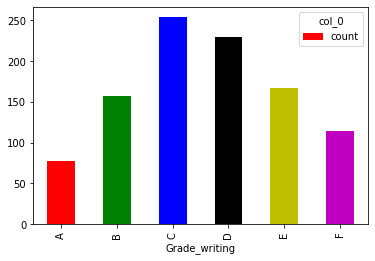

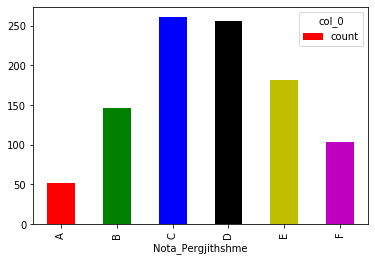

In [16]:
#Bar Plots for categorical Variables
my_colors = 'rgbkymc'
for i in students.select_dtypes(['object']).columns:
    my_tab = pd.crosstab(index = students[i], columns="count")     
    my_tab.plot.bar(color=my_colors)

In [17]:
# kontrollojmë për çdo kolonë jo unike
students.apply(pd.Series.nunique)

gender                           2
race ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      81
reading score                   72
writing score                   77
Perqindja                      194
Grade_math                       6
Grade_reading                    6
Grade_writing                    6
Nota_Pergjithshme                6
dtype: int64

In [18]:
total_students = students.shape[0]
students_score_more_than_50 = students[students['math score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_maths = (students_score_more_than_50/total_students)*100
print("Propabiliteti qe studentet te marrin me shume se 50 pike ne Matematike:", probability_of_students_scoring_more_than_50_in_maths)

Propabiliteti qe studentet te marrin me shume se 50 pike ne Matematike: 85.0


In [19]:
total_students = students.shape[0]
students_score_more_than_50 = students[students['reading score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_maths = (students_score_more_than_50/total_students)*100
print("Propabiliteti qe studentet te marrin me shume se 50 pike ne Lexim:", probability_of_students_scoring_more_than_50_in_maths)

Propabiliteti qe studentet te marrin me shume se 50 pike ne Lexim: 90.3


In [20]:
total_students = students.shape[0]
students_score_more_than_50 = students[students['writing score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_maths = (students_score_more_than_50/total_students)*100
print("Propabiliteti qe studentet te marrin me shume se 50 pike ne Shkrim:", probability_of_students_scoring_more_than_50_in_maths)

Propabiliteti qe studentet te marrin me shume se 50 pike ne Shkrim: 87.6


In [21]:
total_students = students.shape[0]
number_of_students_passing_in_all_subjects = students[(students['math score'] > 50) &
                                                  (students['writing score'] > 50) & 
                                                  (students['reading score'] > 50)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects/total_students)*100
print("Propabiliteti qe studentet te marrin me shume se 50 pike ne 3 lendet: {0:.2f} %".format(probability_of_students_passing_in_all_the_subjects))

Propabiliteti qe studentet te marrin me shume se 50 pike ne 3 lendet: 79.60 %


In [22]:
total_students = students.shape[0]
number_of_students_passing_in_all_subjects = students[(students['math score'] > 90) &
                                                  (students['writing score'] > 90) & 
                                                  (students['reading score'] > 90)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects/total_students)*100
print("Propabiliteti qe studentet te marrin me shume se 90 pike ne 3 lendet: {0:.2f} %".format(probability_of_students_passing_in_all_the_subjects))

Propabiliteti qe studentet te marrin me shume se 90 pike ne 3 lendet: 2.30 %


# Grupimi

In [23]:
students[(students['gender'] == 'female') &
     (students['math score'] > 90) & 
     (students['writing score'] > 90) &
     (students['reading score'] > 90)]

,gender,race ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Perqindja,Grade_math,Grade_reading,Grade_writing,Nota_Pergjithshme
114,female,group E,bachelors degree,standard,completed,99,100,100,99.666667,A,A,A,A
165,female,group C,bachelors degree,standard,completed,96,100,100,98.666667,A,A,A,A
179,female,group D,some high school,standard,completed,97,100,100,99.000000,A,A,A,A
451,female,group E,some college,standard,none,100,92,97,96.333333,A,A,A,A
458,female,group E,bachelors degree,standard,none,100,100,100,100.000000,A,A,A,A
546,female,group A,some high school,standard,completed,92,100,97,96.333333,A,A,A,A
566,female,group E,bachelors degree,free reduced,completed,92,100,100,97.333333,A,A,A,A
594,female,group C,bachelors degree,standard,completed,92,100,99,97.000000,A,A,A,A
685,female,group E,masters degree,standard,completed,94,99,100,97.666667,A,A,A,A
712,female,group D,some college,standard,none,98,100,99,99.000000,A,A,A,A


**250 nxenese kane noten 10 ne te 3 lendet.**

In [24]:
students.groupby(['gender']).agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

            Perqindja                    
        max       min     median    max  
gender                                   
female  100       9.0  70.333333  100.0  
male    100      23.0  66.333333  100.0

In [25]:
students[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [26]:
students[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

In [27]:
students[['race ethnicity',
      'math score',
      'writing score',
      'reading score']].groupby(['race ethnicity']).agg('median')

,math score,writing score,reading score
race ethnicity,,,
group A,61.0,62.0,64.0
group B,63.0,67.0,67.0
group C,65.0,68.0,71.0
group D,69.0,72.0,71.0
group E,74.5,72.0,74.0


# Vizualizimi i të dhënave


### Së pari shqyrtojmë rezultatet e provimit:

## Matematikë:

**Le të hedhim një vështrim në shpërndarjen e notave duke përdorur një countplot nga libraria seaborn.**

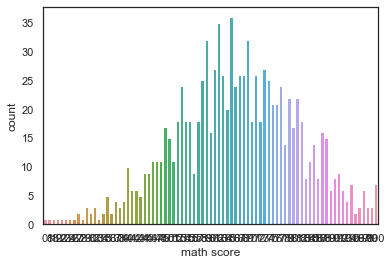

In [28]:
sns.set(style = "white")
sns.countplot(x = "math score", data = students)

**Tani, ne kontrollojmë se si studentët performuan në këtë provim.**


In [29]:
students.Grade_math.value_counts()

D    268
C    216
E    188
F    135
B    135
A     58
Name: Grade_math, dtype: int64

*135 studentë nga 1000 studentë dështuan në këtë provim.*

**Le të kontrollojmë shpërndarjen e notave duke përdorur një countplot.**

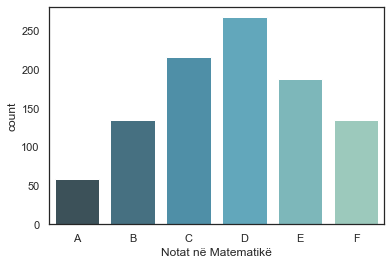

In [30]:
order_grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_math", data = students, order = order_grade, palette = "GnBu_d")
_ = plt.xlabel("Notat në Matematikë")

# Lexim

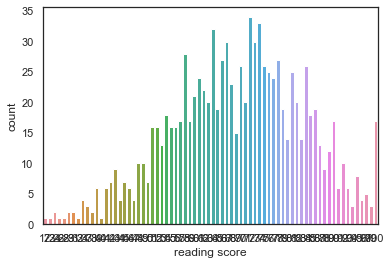

In [31]:
sns.countplot(x = "reading score", data = students)

In [32]:
students.Grade_reading.value_counts()

C    264
D    233
B    170
E    164
F     90
A     79
Name: Grade_reading, dtype: int64

*90 nga 1000 studentë dështuan në këtë provim.*

**Le të kontrollojmë shpërndarjen e notave duke përdorur një countplot.**

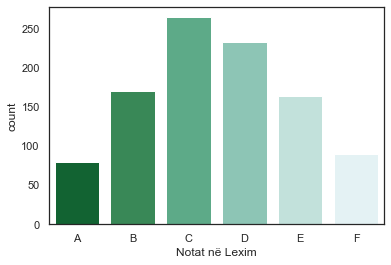

In [33]:
sns.countplot(x= "Grade_reading",data = students, order = order_grade, palette = "BuGn_r")
_ = plt.xlabel("Notat në Lexim")

# Shkrim

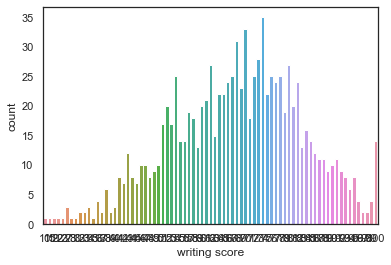

In [34]:
sns.countplot(x = "writing score", data = students)

In [35]:
students.Grade_writing.value_counts()

C    254
D    230
E    167
B    157
F    114
A     78
Name: Grade_writing, dtype: int64

*114 nga 1000 studentë dështuan në këtë provim.*

**Le të kontrollojmë shpërndarjen e notave duke përdorur countplot.**

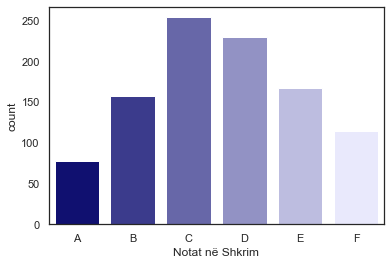

In [36]:
sns.countplot(x = "Grade_writing", data = students, order = order_grade, palette = sns.light_palette("navy", reverse=True))
_ = plt.xlabel("Notat në Shkrim")

# Nota e përgjithshme

**Tani kontrollojmë performancën e përgjithshme të studentëve në të tre provimet.**

In [37]:
students.Nota_Pergjithshme.value_counts()

C    261
D    256
E    182
B    146
F    103
A     52
Name: Nota_Pergjithshme, dtype: int64

*103 nga 1000 studentë dështuan në provime.*

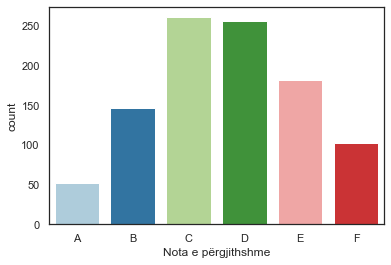

In [38]:
sns.countplot(x = 'Nota_Pergjithshme', order = order_grade, data = students, palette = 'Paired')
_ = plt.xlabel("Nota e përgjithshme")

### Tani, le të shohim se si rezultati i leximit dhe rezultati i shkrimit janë të lidhura me njëra-tjetrën :

**Le të krijojmë scatter plots për të ekzaminuar rezultatet**

**Rezultati i leximit vs rezultati i shkrimit:**

In [39]:
students.corr()

,math score,reading score,writing score,Perqindja
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
Perqindja,0.918746,0.970331,0.965667,1.000000


**Siç e dimë koeficienti i korrelacionit linear të Pearson qëndron midis -1 deri në 1.**

*rezultati i leximit dhe rezultati i të shkruarit lidhen në mënyrë lineare me vlerë të koeficientit rreth 0.95(përafërsisht)*

*rezultati i leximit dhe rezultati në matematikë lidhen në mënyrë lineare me vlerë të koeficientit rreth 0.81(përafërsisht)*

*rezultati i të shkruarit dhe rezultati në matematikë  lidhen në mënyrë lineare me vlerë të koeficientit rreth 0.80(përafërsisht)*

**Scatter Plot -Rezultati i shkrimit vs rezultati i leximit: **

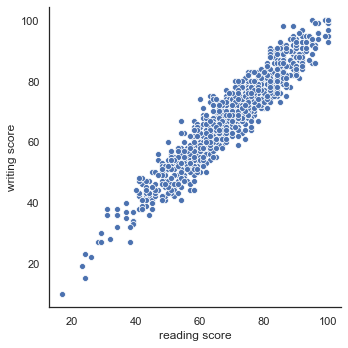

In [40]:
sns.relplot(x='reading score', y = 'writing score', data = students)

**Scatter Plot -Rezultati i shkrimit vs rezultati ne matematike: **

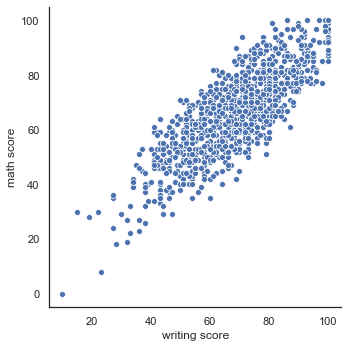

In [41]:
sns.relplot(x='writing score', y = 'math score', data = students)

**Scatter Plot -Rezultati ne matematike vs rezultati i leximit: **

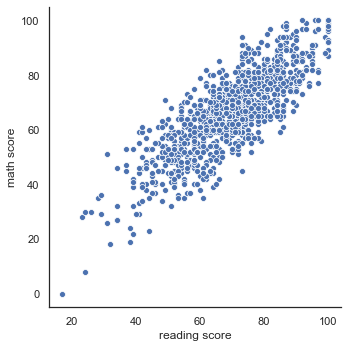

In [42]:
sns.relplot(x='reading score', y = 'math score', data = students)

# Tani, ne vizualizojmë të dhënat për të kuptuar ndikimin e faktorëve të ndryshëm në performancën e studentëve

## Raca / Etnia:
**Së pari kontrollojmë numrin e studentëve nga grupi i ndryshëm i përkatësisë etnike**

In [43]:
students["race ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race ethnicity, dtype: int64

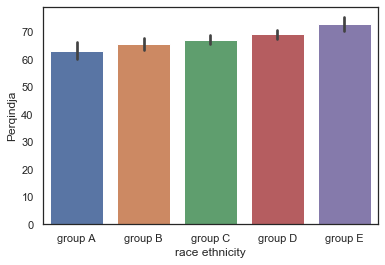

In [44]:
order_race = ["group A","group B", "group C", "group D", "group E"]
sns.barplot(students['race ethnicity'],students['Perqindja'], order=order_race)

*Nga grafiku i mësipërm mund të themi se studentët e grupit E dhe D kanë punuar shumë mirë në provime në mesin e grupeve etnike*

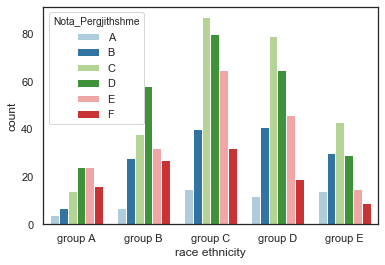

In [45]:
sns.countplot(x = "race ethnicity", data = students, hue = "Nota_Pergjithshme", hue_order = ["A","B","C","D","E","F"], palette = "Paired", order=order_race)
order_race = ["group A","group B", "group C", "group D", "group E"]

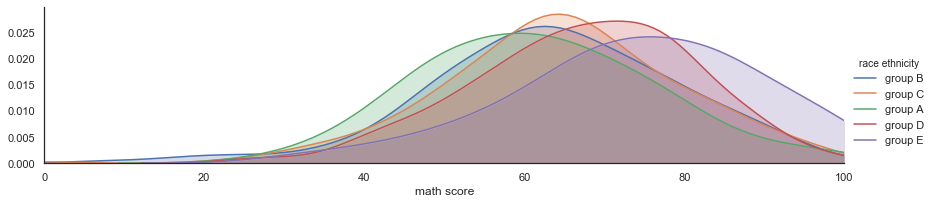

In [46]:
facet = sns.FacetGrid(students, hue="race ethnicity",aspect=4)
facet.map(sns.kdeplot,'math score',shade= True)
facet.set(xlim=(0, students['math score'].max()))
facet.add_legend()
 
plt.show()

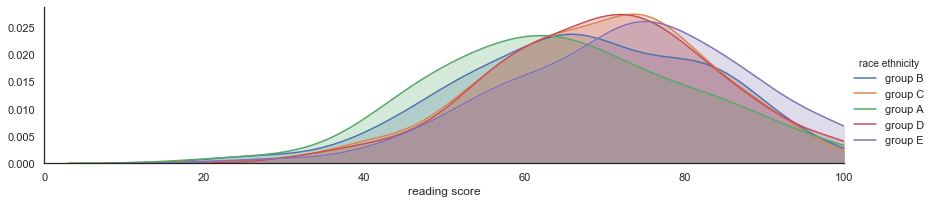

In [47]:
facet = sns.FacetGrid(students, hue="race ethnicity",aspect=4)
facet.map(sns.kdeplot,'reading score',shade= True)
facet.set(xlim=(0, students['reading score'].max()))
facet.add_legend()
 
plt.show()

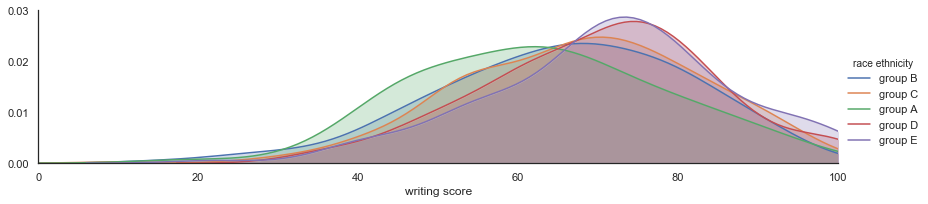

In [48]:
facet = sns.FacetGrid(students, hue="race ethnicity",aspect=4)
facet.map(sns.kdeplot,'writing score',shade= True)
facet.set(xlim=(0, students['writing score'].max()))
facet.add_legend()
 
plt.show()

## Dreka:
**Së pari kontrollojmë numrin e studentëve të kategorisë së ndryshme të drekës**

In [49]:
students["lunch"].value_counts()

standard        645
free reduced    355
Name: lunch, dtype: int64

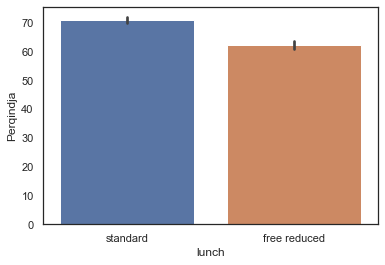

In [50]:
sns.barplot(students['lunch'],students['Perqindja'])

*Nga grafiku i mësipërm mund të konkludojmë se studentët me drekë standarde shënuan më mirë se të tjerët*

**Tani kontrollojmë shpërndarjen e përgjithshme të klasave të studentëve të kategorisë së ndryshme të drekës duke përdorur countplot**

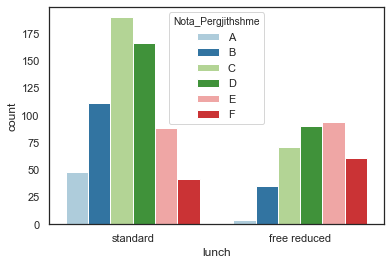

In [51]:
sns.countplot(x = "lunch", data = students, hue = "Nota_Pergjithshme", hue_order = ["A","B","C","D","E","F"], palette = "Paired")

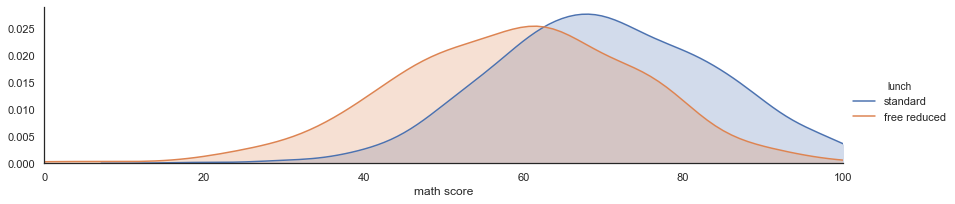

In [52]:
facet = sns.FacetGrid(students, hue="lunch",aspect=4)
facet.map(sns.kdeplot,'math score',shade= True)
facet.set(xlim=(0, students['math score'].max()))
facet.add_legend()
 
plt.show() 

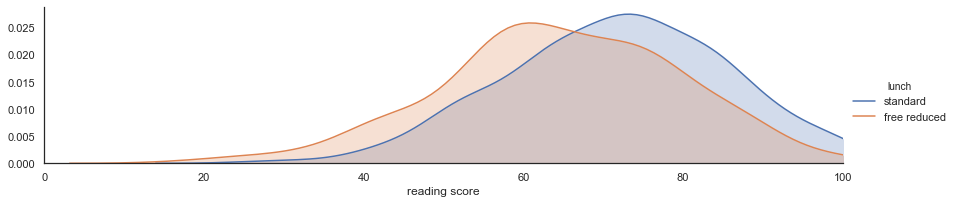

In [53]:
facet = sns.FacetGrid(students, hue="lunch",aspect=4)
facet.map(sns.kdeplot,'reading score',shade= True)
facet.set(xlim=(0, students['reading score'].max()))
facet.add_legend()
 
plt.show()

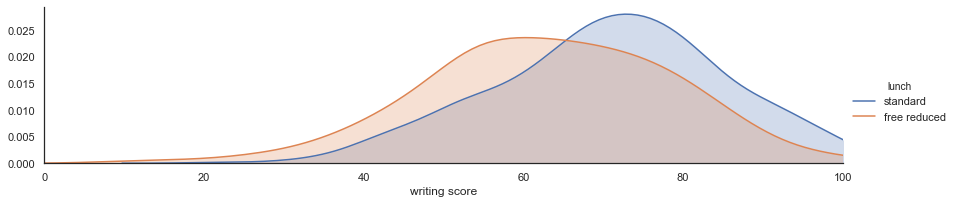

In [54]:
facet = sns.FacetGrid(students, hue="lunch",aspect=4)
facet.map(sns.kdeplot,'writing score',shade= True)
facet.set(xlim=(0, students['writing score'].max()))
facet.add_legend()
 
plt.show()

## Kursi i përgatitjes së testit:
**Si më parë, fillojmë me kontrollimin e nr. të studentëve që kanë përfunduar kursin e tyre të përgatitjes ose jo**

In [55]:
students["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

**Krahasojmë rezultatet e studentëve duke përdorin Boxen plot**

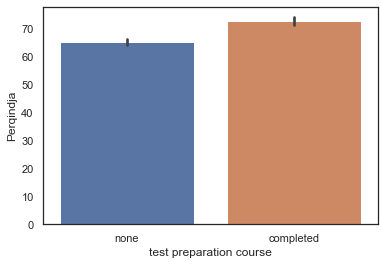

In [56]:
sns.barplot(students['test preparation course'],students['Perqindja'])

*Nga grafiku i mësipërm mund të themi se, studentët që kishin përfunduar kursin e përgatitjes së testit shënuan më mirë se të tjerët*

**Tani kontrollojmë shpërndarjen e studentëve bazuar në notë të përgjithshme**

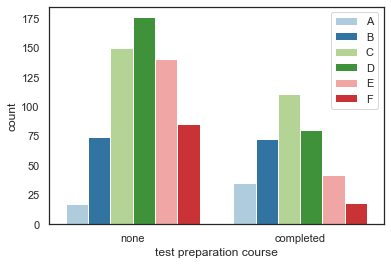

In [57]:
sns.countplot(x = "test preparation course", hue = "Nota_Pergjithshme",data = students, hue_order = order_grade, palette = 'Paired')
_ = plt.legend()

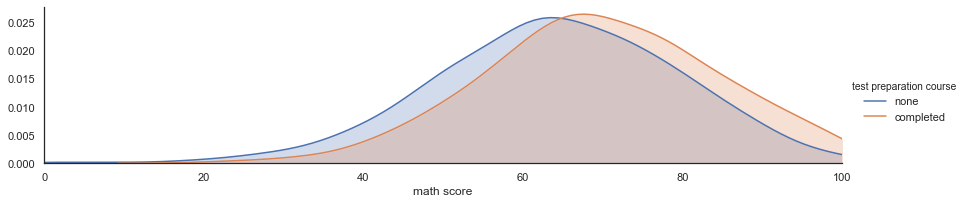

In [58]:
facet = sns.FacetGrid(students, hue="test preparation course",aspect=4)
facet.map(sns.kdeplot,'math score',shade= True)
facet.set(xlim=(0, students['math score'].max()))
facet.add_legend()
 
plt.show()  

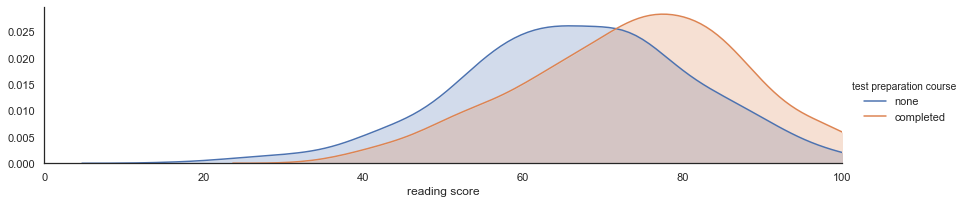

In [59]:
facet = sns.FacetGrid(students, hue="test preparation course",aspect=4)
facet.map(sns.kdeplot,'reading score',shade= True)
facet.set(xlim=(0, students['reading score'].max()))
facet.add_legend()
 
plt.show() 

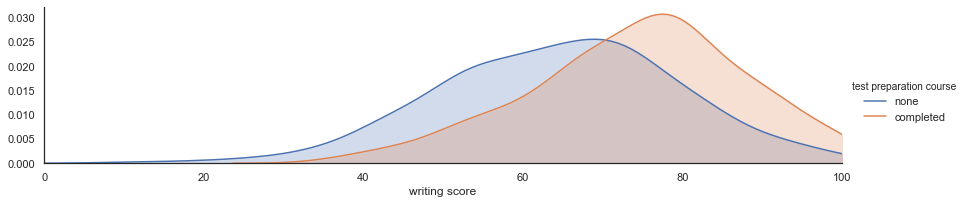

In [60]:
facet = sns.FacetGrid(students, hue="test preparation course",aspect=4)
facet.map(sns.kdeplot,'writing score',shade= True)
facet.set(xlim=(0, students['writing score'].max()))
facet.add_legend()
 
plt.show() 

## Niveli arsimor i prindërve:
**Së pari fillojmë me kontrollin nr. studentë me arsim të ndryshëm prindëror**

In [61]:
students["parental level of education"].value_counts()

some college         226
associates degree    222
high school          196
some high school     179
bachelors degree     118
masters degree        59
Name: parental level of education, dtype: int64

**Tani kontrollojmë shpërndarjen e notave bazuar në nivelin e arsimit të ndryshëm prindëror duke përdorur count plot.

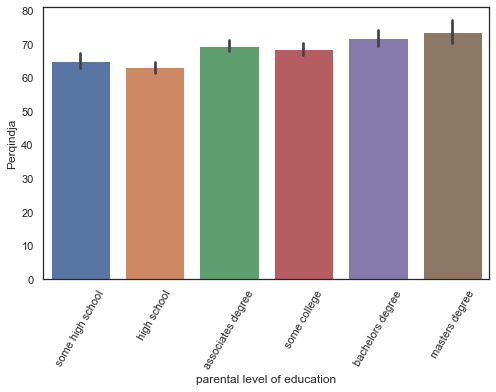

In [62]:
plt.figure(figsize=(8,5))
order_edu = ['some high school','high school','associates degree','some college','bachelors degree','masters degree']
sns.barplot(students['parental level of education'],students['Perqindja'],order=order_edu)
plt.xticks(rotation=60)
plt.show()

*Nga grafiku i mësipërm mund të themi se, studentët prindërit e të cilëve kanë diplomë Master shënuan më mirë se të tjerët*

**Tani kontrollojmë shpërndarjen e studentëve bazuar në notë të përgjithshme**

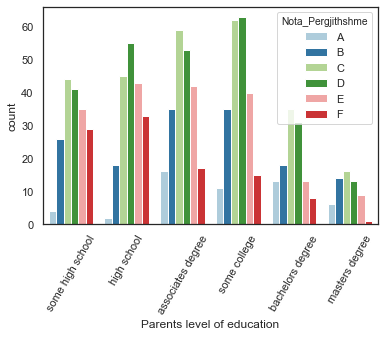

In [63]:
p = sns.countplot(x='parental level of education', hue='Nota_Pergjithshme',data=students, order= order_edu, hue_order = order_grade, palette = 'Paired')
_ = plt.xlabel('Parents level of education')
_ = plt.setp(p.get_xticklabels(), rotation = 60)

*Nga grafiku i mësipërm mund të konkludojmë se studenti, prindërit e të cilit kanë diplomë master kanë punuar më mirë se të tjerët*


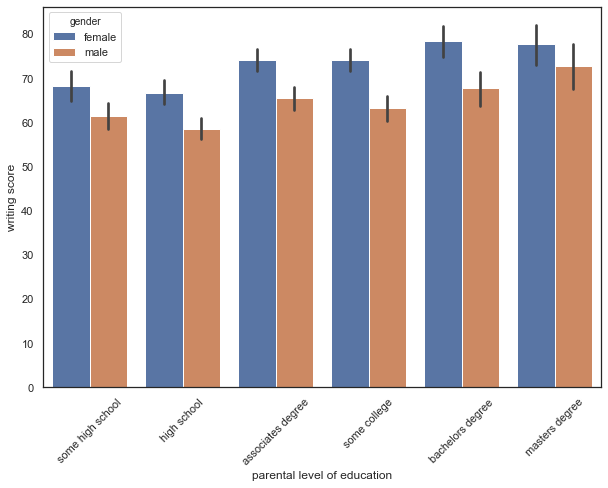

In [64]:
plt.figure(figsize=(10,7))
sns.barplot(x = "parental level of education", y = "writing score", hue = "gender", data = students, order=order_edu)

plt.xticks(rotation=45)
plt.show()

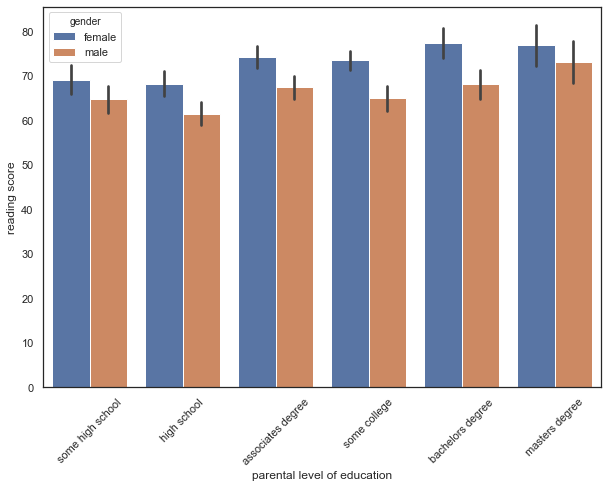

In [65]:
plt.figure(figsize=(10,7))
sns.barplot(x = "parental level of education", y = "reading score", hue = "gender", data = students,order=order_edu)
plt.xticks(rotation=45)
plt.show()

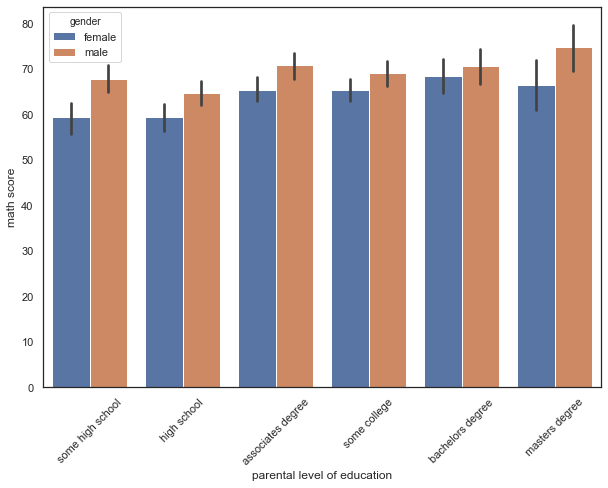

In [66]:
plt.figure(figsize=(10,7))
sns.barplot(x = "parental level of education", y = "math score", hue = "gender", data = students, order=order_edu)
plt.xticks(rotation=45)
plt.show()

**Nga grafiket me lart shohim se ne lexim dhe shkrim vajzat jane me te mira, ndersa djemte ne matematike dhe sa me i larte te jete niveli arsimor i prinderve aq me te sukseshem kane rezultuar studentet.

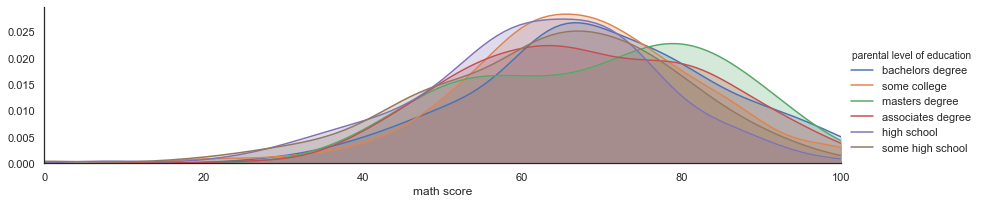

In [67]:
facet = sns.FacetGrid(students, hue="parental level of education",aspect=4)
facet.map(sns.kdeplot,'math score',shade= True)
facet.set(xlim=(0, students['math score'].max()))
facet.add_legend()
 
plt.show()  

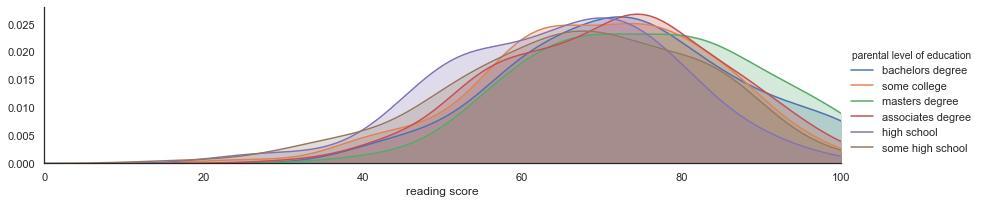

In [68]:
facet = sns.FacetGrid(students, hue="parental level of education",aspect=4)
facet.map(sns.kdeplot,'reading score',shade= True)
facet.set(xlim=(0, students['reading score'].max()))
facet.add_legend()
 
plt.show()  

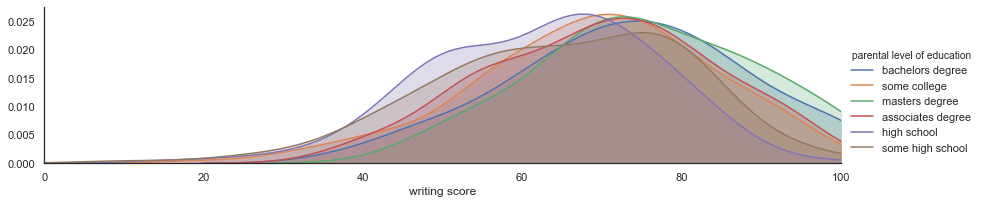

In [69]:
facet = sns.FacetGrid(students, hue="parental level of education",aspect=4)
facet.map(sns.kdeplot,'writing score',shade= True)
facet.set(xlim=(0, students['writing score'].max()))
facet.add_legend()
 
plt.show()  

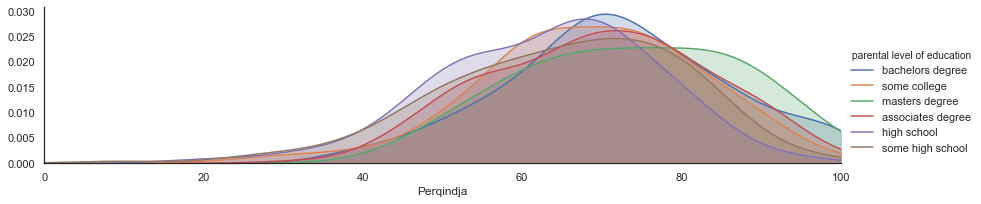

In [70]:
facet = sns.FacetGrid(students, hue="parental level of education",aspect=4)
facet.map(sns.kdeplot,'Perqindja',shade= True)
facet.set(xlim=(0, students['Perqindja'].max()))
facet.add_legend()
 
plt.show()  

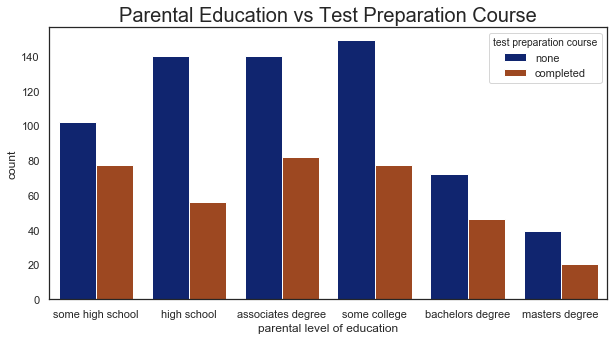

In [71]:
# Krahasimi mes Parental Educatuon dhe Test Preparation course

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(x = 'parental level of education', data = students, hue = 'test preparation course', palette = 'dark',order=order_edu)
plt.title('Parental Education vs Test Preparation Course', fontweight = 30, fontsize = 20)
plt.show()

In [72]:
#passing_marks = 50
#students['math score'] = np.where(students['math score']<passing_marks ,'F','P')
#students['math score'].value_counts()

In [73]:
#students['reading score'] = np.where(students['reading score']<passing_marks ,'F','P')
#students['reading score'].value_counts()

In [74]:
#students['writing score'] = np.where(students['writing score']<passing_marks ,'F','P')
#students['writing score'].value_counts()

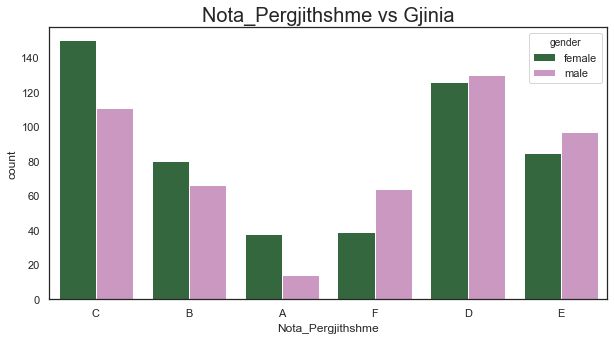

In [75]:
# comparing the distribution of grades among males and females

sns.countplot(x = students['Nota_Pergjithshme'], data = students, hue = students['gender'], palette = 'cubehelix')
#sns.palplot(sns.dark_palette('purple'))
plt.title('Nota_Pergjithshme vs Gjinia', fontweight = 30, fontsize = 20)
plt.show()

## Përfundim
**Përmbledhje e vogël e të gjithë kodit shkruar më lart:**

* 135 studentë dështuan në matematikë, 90 studentë dështuan në provimin e leximit, 114 studentë dështuan në provimin me shkrim dhe gjithsej 103 studentë dështuan në të tre provimet(Nota e përgjithshme).
* Midis të gjithë studentëve kemi parë që numri i studentëve me notën "C" dhe "D" është shumë i lartë.
* Rezultati i leximit dhe rezultati i shkrimit lidhen pozitivisht në mënyrë lineare me koeficientin e korrelacionit 0.95 (afërsisht).
* Studentët që i përkasin grupit D në përkatësi etnike performuan shumë mirë.
* Kursi i përgatitjes së testit është shumë efektiv. Ne pamë që studentët që kishin mbaruar kursin e përgatitjes së testit dështuan më pak në numër.
* Studentët që marrin drekë standarde performuan shumë më mirë se të tjerët.
* Në rast të nivelit të arsimit prindëror nëse shikojmë count plot dhe vëzhgojmë shiritin e kuq (që tregon numrin e studentëve që morën notën "F") mund të shohim efektin e nivelit të arsimit të prindërve.

# Mapimi i te dhenave

### I kthejme te dhenat string ne te dhena te lexueshme per kompjuterin

In [76]:
students.head(10)

,gender,race ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Perqindja,Grade_math,Grade_reading,Grade_writing,Nota_Pergjithshme
0,female,group B,bachelors degree,standard,none,72,72,74,72.666667,C,C,C,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,D,A,B,B
2,female,group B,masters degree,standard,none,90,95,93,92.666667,A,A,A,A
3,male,group A,associates degree,free reduced,none,47,57,44,49.333333,F,E,F,F
4,male,group C,some college,standard,none,76,78,75,76.333333,C,C,C,C
5,female,group B,associates degree,standard,none,71,83,78,77.333333,C,B,C,C
6,female,group B,some college,standard,completed,88,95,92,91.666667,B,A,A,A
7,male,group B,some college,free reduced,none,40,43,39,40.666667,F,F,F,F
8,male,group D,high school,free reduced,completed,64,64,67,65.000000,D,D,D,D
9,female,group B,high school,free reduced,none,38,60,50,49.333333,F,D,E,F


In [77]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
students['test preparation course'] = le.fit_transform(students['test preparation course'])

# label encoding for lunch
students['lunch'] = le.fit_transform(students['lunch'])

# label encoding for race ethnicity
# we have to map values to each of the categories
students['race ethnicity'] = students['race ethnicity'].replace('group A', 1)
students['race ethnicity'] = students['race ethnicity'].replace('group B', 2)
students['race ethnicity'] = students['race ethnicity'].replace('group C', 3)
students['race ethnicity'] = students['race ethnicity'].replace('group D', 4)
students['race ethnicity'] = students['race ethnicity'].replace('group E', 5)

# label encoding for parental level of education
students['parental level of education'] = students['parental level of education'].replace('some high school', 0)
students['parental level of education'] = students['parental level of education'].replace('high school', 1)
students['parental level of education'] = students['parental level of education'].replace('associates degree', 2)
students['parental level of education'] = students['parental level of education'].replace('some college', 3)
students['parental level of education'] = students['parental level of education'].replace('bachelors degree', 4)
students['parental level of education'] = students['parental level of education'].replace('masters degree', 5)


#label encoding for gender
students['gender'] = le.fit_transform(students['gender'])

students['Grade_math'] = students['Grade_math'].replace('A', 10)
students['Grade_math'] = students['Grade_math'].replace('B', 9)
students['Grade_math'] = students['Grade_math'].replace('C', 8)
students['Grade_math'] = students['Grade_math'].replace('D', 7)
students['Grade_math'] = students['Grade_math'].replace('E', 6)
students['Grade_math'] = students['Grade_math'].replace('F', 5)
# label encoding for Grade_reading
students['Grade_reading'] = students['Grade_reading'].replace('A', 10)
students['Grade_reading'] = students['Grade_reading'].replace('B', 9)
students['Grade_reading'] = students['Grade_reading'].replace('C', 8)
students['Grade_reading'] = students['Grade_reading'].replace('D', 7)
students['Grade_reading'] = students['Grade_reading'].replace('E', 6)
students['Grade_reading'] = students['Grade_reading'].replace('F', 5)

# label encoding for Grade_writing
students['Grade_writing'] = students['Grade_writing'].replace('A', 10)
students['Grade_writing'] = students['Grade_writing'].replace('B', 9)
students['Grade_writing'] = students['Grade_writing'].replace('C', 8)
students['Grade_writing'] = students['Grade_writing'].replace('D', 7)
students['Grade_writing'] = students['Grade_writing'].replace('E', 6)
students['Grade_writing'] = students['Grade_writing'].replace('F', 5)

students['Nota_Pergjithshme'] = students['Nota_Pergjithshme'].replace('A', 10)
students['Nota_Pergjithshme'] = students['Nota_Pergjithshme'].replace('B', 9)
students['Nota_Pergjithshme'] = students['Nota_Pergjithshme'].replace('C', 8)
students['Nota_Pergjithshme'] = students['Nota_Pergjithshme'].replace('D', 7)
students['Nota_Pergjithshme'] = students['Nota_Pergjithshme'].replace('E', 6)
students['Nota_Pergjithshme'] = students['Nota_Pergjithshme'].replace('F', 5)

In [78]:
students.head(10)

,gender,race ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Perqindja,Grade_math,Grade_reading,Grade_writing,Nota_Pergjithshme
0,0,2,4,1,1,72,72,74,72.666667,8,8,8,8
1,0,3,3,1,0,69,90,88,82.333333,7,10,9,9
2,0,2,5,1,1,90,95,93,92.666667,10,10,10,10
3,1,1,2,0,1,47,57,44,49.333333,5,6,5,5
4,1,3,3,1,1,76,78,75,76.333333,8,8,8,8
5,0,2,2,1,1,71,83,78,77.333333,8,9,8,8
6,0,2,3,1,0,88,95,92,91.666667,9,10,10,10
7,1,2,3,0,1,40,43,39,40.666667,5,5,5,5
8,1,4,1,0,0,64,64,67,65.000000,7,7,7,7
9,0,2,1,0,1,38,60,50,49.333333,5,7,6,5


# Modeling

## MultiClass Classification

### Parashikimi i notes ne Matematike duke marre parasysh vetem parametrat: Gender, race/ethnicity, parental level of education,	lunch	dhe test preparation course

#### Logistic Regression
Saktesia (Training): 32.13
Saktesia (Testing): 30.0

#### Random Forest
Saktesia (Training): 50.13
Saktesia (Testing): 25.6

In [79]:
students1=students.drop(['math score','reading score','writing score','Perqindja'],1)

In [80]:
students1.Grade_math.value_counts()

7     268
8     216
6     188
9     135
5     135
10     58
Name: Grade_math, dtype: int64

In [81]:
# ndarja e ndryshoreve të varura dhe të pavarura

x = students1.iloc[:,:5]
y = students1.iloc[:,5]

print(x.shape)
print(y.shape)

(1000, 5)
(1000,)


In [82]:
# ndarjen e datasetit në training dhe testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train.head()

(750, 5)
(750,)
(250, 5)
(250,)


,gender,race ethnicity,parental level of education,lunch,test preparation course
116,0,2,4,0,1
902,0,1,1,0,0
549,1,3,5,1,1
327,1,1,3,0,1
164,0,5,5,1,1


In [83]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler

#Shkallezimin e veqorive dmth studentet qe kane veqori me te larta pritet me pas nota me te larta
ss = StandardScaler()

# feeding the independent variable into the scaler
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [84]:
#KODI PER CONFUSION MATRIX

#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
#Code for visualizing confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression

#Modeli i perdorur
model1 = LogisticRegression()
# futja e te dhenave trajnuese ne model
model1.fit(x_train, y_train)
# Parashikimi i rezultateve ne test set
y_pred = model1.predict(x_test)

#Llogaritja e saktesise
print("NOTA NE MATEMATIKE\n\n\nLOGISTIC REGRESSION\nSaktesia (Training):",round(np.mean(model1.score(x_train, y_train))*100, 2)) 
print("Saktesia (Testing):", round(np.mean(model1.score(x_test, y_test))*100, 2))
#Modeli i perdorur
model = RandomForestClassifier()
# futja e te dhenave trajnuese ne model
model.fit(x_train, y_train)
# Parashikimi i rezultateve ne test set
y_pred = model.predict(x_test)

#Llogaritja e saktesise
print("\nRANDOM FOREST\nSaktesia (Training):",round(np.mean(model.score(x_train, y_train))*100, 2)) 
print("Saktesia (Testing):", round(np.mean(model.score(x_test, y_test))*100, 2),'\n\n')

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


NOTA NE MATEMATIKE


LOGISTIC REGRESSION
Saktesia (Training): 32.13
Saktesia (Testing): 30.0

RANDOM FOREST
Saktesia (Training): 50.13
Saktesia (Testing): 24.4 


              precision    recall  f1-score   support

           5       0.25      0.21      0.23        39
           6       0.23      0.31      0.26        52
           7       0.28      0.21      0.24        73
           8       0.24      0.24      0.24        50
           9       0.18      0.25      0.21        24
          10       0.33      0.33      0.33        12

    accuracy                           0.24       250
   macro avg       0.25      0.26      0.25       250
weighted avg       0.25      0.24      0.24       250



Confusion matrix
[[ 8 11  7  6  7  0]
 [ 6 16 18  5  5  2]
 [12 23 15 15  7  1]
 [ 5 18  8 12  4  3]
 [ 1  1  4 10  6  2]
 [ 0  1  2  1  4  4]]


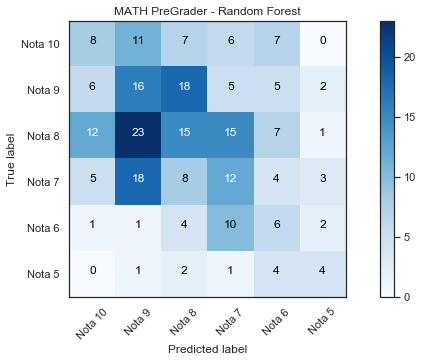

In [86]:
from sklearn.metrics import confusion_matrix

names = ["Nota 10", "Nota 9", "Nota 8","Nota 7","Nota 6","Nota 5"]
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, classes=names, title='MATH PreGrader - Random Forest')

### Parashikimi i notes ne Lexim duke marre parasysh parametrat e pare si dhe noten ne Matematike

#### Logistic Regression
Saktesia (Training): 51.73
Saktesia (Testing): 45.6

#### Random Forest
Saktesia (Training): 81.2
Saktesia (Testing): 37.6


In [87]:
students2=students.drop(['math score','reading score','writing score','Perqindja'],1)
students2.to_csv("output/students2.csv", index=False)

In [88]:
students2.Grade_reading.value_counts()

8     264
7     233
9     170
6     164
5      90
10     79
Name: Grade_reading, dtype: int64

In [89]:
# ndarja e ndryshoreve të varura dhe të pavarura

x = students2.iloc[:,:6]
y = students2.iloc[:,6]

print(x.shape)
print(y.shape)

(1000, 6)
(1000,)


In [90]:
# ndarjen e datasetit në training dhe testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train.head()

(750, 6)
(750,)
(250, 6)
(250,)


,gender,race ethnicity,parental level of education,lunch,test preparation course,Grade_math
116,0,2,4,0,1,8
902,0,1,1,0,0,5
549,1,3,5,1,1,8
327,1,1,3,0,1,5
164,0,5,5,1,1,9


In [91]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler

#Shkallezimin e veqorive dmth studentet qe kane veqori me te larta pritet me pas nota me te larta
ss = StandardScaler()

# feeding the independent variable into the scaler
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression

#Modeli i perdorur
model1 = LogisticRegression()
# futja e te dhenave trajnuese ne model
model1.fit(x_train, y_train)
# Parashikimi i rezultateve ne test set
y_pred = model1.predict(x_test)

#Llogaritja e saktesise
print("NOTA NE LEXIM\n\nLOGISTIC REGRESSION\nSaktesia (Training):",round(np.mean(model1.score(x_train, y_train))*100, 2)) 
print("Saktesia (Testing):", round(np.mean(model1.score(x_test, y_test))*100, 2))

#Modeli i perdorur
model = RandomForestClassifier()
# futja e te dhenave trajnuese ne model
model.fit(x_train, y_train)
# Parashikimi i rezultateve ne test set
y_pred = model.predict(x_test)

#Llogaritja e saktesise
print("\nRANDOM FOREST\nSaktesia (Training):",round(np.mean(model.score(x_train, y_train))*100, 2)) 
print("Saktesia (Testing):", round(np.mean(model.score(x_test, y_test))*100, 2),'\n\n')

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

NOTA NE LEXIM

LOGISTIC REGRESSION
Saktesia (Training): 51.73
Saktesia (Testing): 45.6

RANDOM FOREST
Saktesia (Training): 81.2
Saktesia (Testing): 37.6 


              precision    recall  f1-score   support

           5       0.38      0.48      0.43        21
           6       0.35      0.40      0.37        43
           7       0.28      0.33      0.30        58
           8       0.48      0.37      0.41        79
           9       0.37      0.41      0.39        34
          10       0.56      0.33      0.42        15

    accuracy                           0.38       250
   macro avg       0.40      0.39      0.39       250
weighted avg       0.39      0.38      0.38       250



Confusion matrix
[[10 10  1  0  0  0]
 [12 17 11  3  0  0]
 [ 4 16 19 14  5  0]
 [ 0  5 31 29 13  1]
 [ 0  0  6 11 14  3]
 [ 0  0  0  4  6  5]]


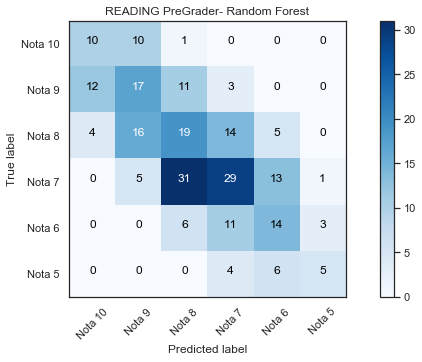

In [93]:
from sklearn.metrics import confusion_matrix
names = ["Nota 10", "Nota 9", "Nota 8","Nota 7","Nota 6","Nota 5"]
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, classes=names, title='READING PreGrader- Random Forest')

### Parashikimi i notes ne shkrim(Grade_writing) duke marre parasysh parametrat e me hershem si dhe noten ne Matematike dhe Lexim

#### Logistic Regression
Saktesia (Training): 70.13
Saktesia (Testing): 67.6

#### Random Forest
Saktesia (Training): 93.33
Saktesia (Testing): 63.6

In [94]:
students3=students.drop(['math score','reading score','writing score','Perqindja'],1)

In [95]:
students3.Grade_writing.value_counts()

8     254
7     230
6     167
9     157
5     114
10     78
Name: Grade_writing, dtype: int64

In [96]:
# ndarja e ndryshoreve të varura dhe të pavarura

x = students3.iloc[:,:7] 
y = students3.iloc[:,7]

print(x.shape)
print(y.shape)

(1000, 7)
(1000,)


In [97]:
# ndarjen e datasetit në training dhe testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train.head()

(750, 7)
(750,)
(250, 7)
(250,)


,gender,race ethnicity,parental level of education,lunch,test preparation course,Grade_math,Grade_reading
116,0,2,4,0,1,8,9
902,0,1,1,0,0,5,5
549,1,3,5,1,1,8,8
327,1,1,3,0,1,5,5
164,0,5,5,1,1,9,10


In [98]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler

#Shkallezimin e veqorive dmth studentet qe kane veqori me te larta pritet me pas nota me te larta
ss = StandardScaler()

# feeding the independent variable into the scaler
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
#Modeli i perdorur
model1 = LogisticRegression()
# futja e te dhenave trajnuese ne model
model1.fit(x_train, y_train)
# Parashikimi i rezultateve ne test set
y_pred = model1.predict(x_test)

#Llogaritja e saktesise
print("NOTA NE SHKRIM\n\nLOGISTIC REGRESSION\nSaktesia (Training):",round(np.mean(model1.score(x_train, y_train))*100, 2)) 
print("Saktesia (Testing):", round(np.mean(model1.score(x_test, y_test))*100, 2))

#Modeli i perdorur
model = RandomForestClassifier()
# futja e te dhenave trajnuese ne model
model.fit(x_train, y_train)
# Parashikimi i rezultateve ne test set
y_pred = model.predict(x_test)

#Llogaritja e saktesise
print("\nRANDOM FOREST\nSaktesia (Training):",round(np.mean(model.score(x_train, y_train))*100, 2)) 
print("Saktesia (Testing):", round(np.mean(model.score(x_test, y_test))*100, 2),'\n\n')

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


prediction = pd.DataFrame({
             "Grade_math": y_pred
    })

prediction.to_csv('output/prediciton.csv', index=False)

NOTA NE SHKRIM

LOGISTIC REGRESSION
Saktesia (Training): 70.13
Saktesia (Testing): 67.6

RANDOM FOREST
Saktesia (Training): 93.33
Saktesia (Testing): 62.8 


              precision    recall  f1-score   support

           5       0.80      0.62      0.70        32
           6       0.55      0.62      0.58        42
           7       0.59      0.69      0.63        54
           8       0.70      0.67      0.68        78
           9       0.48      0.47      0.48        32
          10       0.70      0.58      0.64        12

    accuracy                           0.63       250
   macro avg       0.64      0.61      0.62       250
weighted avg       0.64      0.63      0.63       250



Confusion matrix
[[20 12  0  0  0  0]
 [ 5 26 11  0  0  0]
 [ 0  9 37  8  0  0]
 [ 0  0 15 52 11  0]
 [ 0  0  0 14 15  3]
 [ 0  0  0  0  5  7]]


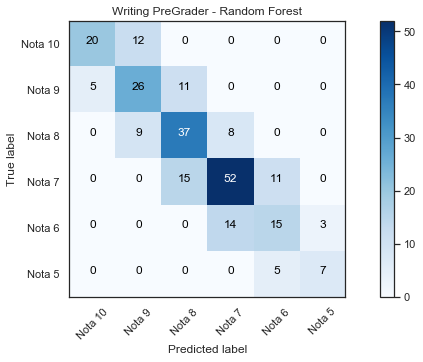

In [100]:
names = ["Nota 10", "Nota 9", "Nota 8","Nota 7","Nota 6","Nota 5"]
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, classes=names, title='Writing PreGrader - Random Forest')

## Parashikimi i Notes Mesatare
#### Saktesia

#### LOGISTIC REGRESSION
Saktesia (Training): 89.73
Saktesia (Testing): 85.6

#### RANDOM FOREST
Saktesia (Training): 98.53
Saktesia (Testing): 81.2

In [101]:
students5=students.drop(['math score','reading score','writing score','Perqindja'],1)

In [102]:
# ndarja e ndryshoreve të varura dhe të pavarura

x = students5.iloc[:,:8] 
y = students5.iloc[:,8]

print(x.shape)
print(y.shape)

(1000, 8)
(1000,)


In [103]:
# ndarjen e datasetit në training dhe testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train.head()

(750, 8)
(750,)
(250, 8)
(250,)


,gender,race ethnicity,parental level of education,lunch,test preparation course,Grade_math,Grade_reading,Grade_writing
116,0,2,4,0,1,8,9,9
902,0,1,1,0,0,5,5,5
549,1,3,5,1,1,8,8,7
327,1,1,3,0,1,5,5,5
164,0,5,5,1,1,9,10,10


In [104]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler

#Shkallezimin e veqorive dmth studentet qe kane veqori me te larta pritet me pas nota me te larta
ss = StandardScaler()

# feeding the independent variable into the scaler
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression

#Modeli i perdorur
model1 = LogisticRegression()
# futja e te dhenave trajnuese ne model
model1.fit(x_train, y_train)
# Parashikimi i rezultateve ne test set
y_pred = model1.predict(x_test)

#Llogaritja e saktesise
print("NOTA MESATARE\n\nLOGISTIC REGRESSION\nSaktesia (Training):",round(np.mean(model1.score(x_train, y_train))*100, 2)) 
print("Saktesia (Testing):", round(np.mean(model1.score(x_test, y_test))*100, 2))

#Modeli i perdorur
model = RandomForestClassifier()
# futja e te dhenave trajnuese ne model
model.fit(x_train, y_train)
# Parashikimi i rezultateve ne test set
y_pred = model.predict(x_test)

#Llogaritja e saktesise
print("\nRANDOM FOREST\nSaktesia (Training):",round(np.mean(model.score(x_train, y_train))*100, 2)) 
print("Saktesia (Testing):", round(np.mean(model.score(x_test, y_test))*100, 2),'\n\n')

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

NOTA MESATARE

LOGISTIC REGRESSION
Saktesia (Training): 89.73
Saktesia (Testing): 85.6

RANDOM FOREST
Saktesia (Training): 98.53
Saktesia (Testing): 81.6 


              precision    recall  f1-score   support

           5       1.00      0.84      0.91        31
           6       0.86      0.88      0.87        50
           7       0.70      0.82      0.76        61
           8       0.80      0.74      0.77        70
           9       0.83      0.86      0.84        28
          10       1.00      0.80      0.89        10

    accuracy                           0.82       250
   macro avg       0.87      0.82      0.84       250
weighted avg       0.83      0.82      0.82       250



Confusion matrix
[[26  5  0  0  0  0]
 [ 0 44  6  0  0  0]
 [ 0  2 50  9  0  0]
 [ 0  0 15 52  3  0]
 [ 0  0  0  4 24  0]
 [ 0  0  0  0  2  8]]


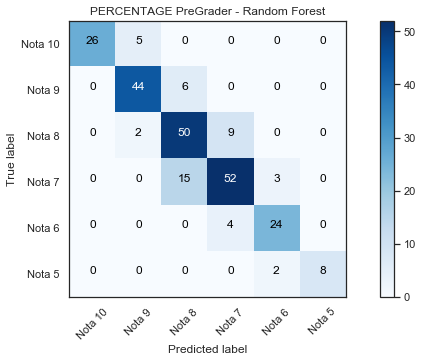

In [106]:
names = ["Nota 10", "Nota 9", "Nota 8","Nota 7","Nota 6","Nota 5"]
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, classes=names, title='PERCENTAGE PreGrader - Random Forest')

# Perdorimi i DecisionTreeClassifier per te parashikuar rezultatet e studenteve(MultiClass) per secilen lende veqmas


## Data Preparation

In [107]:
X=students.drop(['math score','reading score','writing score','Perqindja','Grade_math','Grade_writing',"Grade_reading","Nota_Pergjithshme"],1)

In [108]:
y_math = students["Grade_math"]
y_reading =students["Grade_reading"]
y_writing = students["Grade_writing"]
y_mesatare=students["Nota_Pergjithshme"]

In [109]:
print(X.shape)
print(y_math.shape)
print(y_reading.shape)
print(y_writing.shape)
print(y_mesatare.shape)

(1000, 5)
(1000,)
(1000,)
(1000,)
(1000,)


In [110]:
y_math= pd.get_dummies(y_math)
y_writing= pd.get_dummies(y_writing)
y_reading= pd.get_dummies(y_reading)
y_mesatare= pd.get_dummies(y_mesatare)

In [111]:
X.head(5)

,gender,race ethnicity,parental level of education,lunch,test preparation course
0,0,2,4,1,1
1,0,3,3,1,0
2,0,2,5,1,1
3,1,1,2,0,1
4,1,3,3,1,1


## Modelimi


In [112]:
from sklearn.model_selection import train_test_split 
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X, y_math, test_size=0.3, random_state=3)
X_train_reading, X_test_reading, y_train_reading, y_test_reading = train_test_split(X, y_reading, test_size=0.3, random_state=3)
X_train_writing, X_test_writing, y_train_writing, y_test_writing = train_test_split(X, y_writing, test_size=0.3, random_state=3)
X_train_mesatare, X_test_mesatare, y_train_mesatare, y_test_mesatare = train_test_split(X, y_mesatare, test_size=0.3, random_state=3)

print(X_train_math.shape)
print(y_train_math.shape)
print(X_test_math.shape)
print(y_test_math.shape)

(700, 5)
(700, 6)
(300, 5)
(300, 6)


In [113]:
from sklearn import tree
LogisticRegressionModel_math = tree.DecisionTreeClassifier()
LogisticRegressionModel_math.fit(X_train_math, y_train_math)

LogisticRegressionModel_reading = tree.DecisionTreeClassifier()
LogisticRegressionModel_reading.fit(X_train_reading, y_train_reading)

LogisticRegressionModel_writing = tree.DecisionTreeClassifier()
LogisticRegressionModel_writing.fit(X_train_writing, y_train_writing)

LogisticRegressionModel_mesatare = tree.DecisionTreeClassifier()
LogisticRegressionModel_mesatare.fit(X_train_mesatare, y_train_mesatare)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [118]:
saktesia_train_math = LogisticRegressionModel_math.score(X_train_math, y_train_math)
print ('Saktesia(Training) per Math score:',round(np.mean(saktesia_train_math)*100, 2))

saktesia_train_reading = LogisticRegressionModel_reading.score(X_train_reading, y_train_reading)
print ('Saktesia(Training) per  Reading score:',round(np.mean(saktesia_train_reading)*100, 2))

saktesia_train_writing = LogisticRegressionModel_writing.score(X_train_writing, y_train_writing)
print ('Saktesia(Training) per Writing score:',round(np.mean(saktesia_train_writing)*100, 2))

saktesia_train_mesatare = LogisticRegressionModel_mesatare.score(X_train_mesatare, y_train_mesatare)
print ('Saktesia(Training) per  Noten e Pergjithshme :',round(np.mean(saktesia_train_mesatare)*100, 2))


Saktesia(Training) per Math score: 24.71
Saktesia(Training) per  Reading score: 22.43
Saktesia(Training) per Writing score: 24.14
Saktesia(Training) per  Noten e Pergjithshme : 20.71


In [119]:
saktesia_test_math = LogisticRegressionModel_math.score(X_test_math,y_test_math)
print('saktesia(Testing) per Math score',round(np.mean(saktesia_test_math)*100, 2))

saktesia_test_reading = LogisticRegressionModel_reading.score(X_test_reading,y_test_reading)
print('saktesia(Testing) per reading score: ',round(np.mean(saktesia_test_reading)*100, 2))

saktesia_test_writing = LogisticRegressionModel_writing.score(X_test_writing,y_test_writing)
print('saktesia(Testing) per writing score: ', round(np.mean(saktesia_test_writing)*100, 2))

saktesia_test_mesatare = LogisticRegressionModel_mesatare.score(X_test_mesatare,y_test_mesatare)
print('saktesia(Testing) per Noten e Pergjithshme  ', round(np.mean(saktesia_test_mesatare)*100, 2))

saktesia(Testing) per Math score 9.0
saktesia(Testing) per reading score:  7.67
saktesia(Testing) per writing score:  8.0
saktesia(Testing) per Noten e Pergjithshme   5.33
